In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
    r2_score,
    mean_squared_error, 
    root_mean_squared_error,
    mean_absolute_error, 
    mean_absolute_percentage_error,
    accuracy_score,
    matthews_corrcoef,
    brier_score_loss,
    f1_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
exoplanets_df = pd.read_csv('../data/PSCompPars_2025.06.10_14.20.14.csv', skiprows=88)
exoplanets_df.head()

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  pl_controv_flag   pl_orbper  \
0                        Xinglong Station                0   323.21000   
1  Thueringer Landessternwarte Tautenburg                0   516.21997   
2       Okayama Astrophysical Observatory                0   186.76000   
3                  W. M. Keck Observatory                0  1765.03890   
4                  Multiple Observatories                0   798.50000   

   pl_orbpererr1  ...  sy_disterr2  sy_vmag  sy_vmagerr1  sy_vmagerr2  \
0        0.06000  ...      -1.9238  4.72307        0.023       -0.023   
1        3.20000  ...      -1.9765  5.01300        0.005       -0.005   
2        0.11000  ...      -0.7140  5.23133        0.023       -0.023   
3        1.67709  ...      -0.0073  6.61935        0.023       -0.023   
4        1.00000  ...      -0.0111  6.21500        0.016       -0.016   

   sy_kmag  sy_kmagerr1  sy_kmagerr2  sy_gaiamag  sy_gaiamagerr1  \
0    2.282        0.346       -0.346     4.44038        0.003848   
1    1.939        0.270       -0.270     4.56216        0.003903   
2    2.331        0.240       -0.240     4.91781        0.002826   
3    4.714        0.016       -0.016     6.38300        0.000351   
4    4.651        0.016       -0.016     6.06428        0.000603   

   sy_gaiamagerr2  
0       -0.003848  
1       -0.003903  
2       -0.002826  
3       -0.000351  
4       -0.000603  

[5 rows x 84 columns]

In [3]:
exoplanets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5917 non-null   object 
 1   hostname         5917 non-null   object 
 2   sy_snum          5917 non-null   int64  
 3   sy_pnum          5917 non-null   int64  
 4   discoverymethod  5917 non-null   object 
 5   disc_year        5917 non-null   int64  
 6   disc_facility    5917 non-null   object 
 7   pl_controv_flag  5917 non-null   int64  
 8   pl_orbper        5620 non-null   float64
 9   pl_orbpererr1    5124 non-null   float64
 10  pl_orbpererr2    5124 non-null   float64
 11  pl_orbperlim     5620 non-null   float64
 12  pl_orbsmax       5626 non-null   float64
 13  pl_orbsmaxerr1   3681 non-null   float64
 14  pl_orbsmaxerr2   3681 non-null   float64
 15  pl_orbsmaxlim    5627 non-null   float64
 16  pl_rade          5895 non-null   float64
 17  pl_radeerr1   

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
nan_per_df = pd.DataFrame({'feature_name': exoplanets_df.columns.tolist(), 'nan_per': exoplanets_df.isna().mean()})
nan_per_df

feature_name   nan_per
pl_name                  pl_name  0.000000
hostname                hostname  0.000000
sy_snum                  sy_snum  0.000000
sy_pnum                  sy_pnum  0.000000
discoverymethod  discoverymethod  0.000000
disc_year              disc_year  0.000000
disc_facility      disc_facility  0.000000
pl_controv_flag  pl_controv_flag  0.000000
pl_orbper              pl_orbper  0.050194
pl_orbpererr1      pl_orbpererr1  0.134021
pl_orbpererr2      pl_orbpererr2  0.134021
pl_orbperlim        pl_orbperlim  0.050194
pl_orbsmax            pl_orbsmax  0.049180
pl_orbsmaxerr1    pl_orbsmaxerr1  0.377894
pl_orbsmaxerr2    pl_orbsmaxerr2  0.377894
pl_orbsmaxlim      pl_orbsmaxlim  0.049011
pl_rade                  pl_rade  0.003718
pl_radeerr1          pl_radeerr1  0.311475
pl_radeerr2          pl_radeerr2  0.311475
pl_radelim            pl_radelim  0.003718
pl_radj                  pl_radj  0.003718
pl_radjerr1          pl_radjerr1  0.311475
pl_radjerr2          pl_radjerr2  0.311475
pl_radjlim            pl_radjlim  0.003718
pl_bmasse              pl_bmasse  0.005239
pl_bmasseerr1      pl_bmasseerr1  0.528815
pl_bmasseerr2      pl_bmasseerr2  0.528815
pl_bmasselim        pl_bmasselim  0.005239
pl_bmassj              pl_bmassj  0.005239
pl_bmassjerr1      pl_bmassjerr1  0.528815
pl_bmassjerr2      pl_bmassjerr2  0.528815
pl_bmassjlim        pl_bmassjlim  0.005239
pl_bmassprov        pl_bmassprov  0.000000
pl_orbeccen          pl_orbeccen  0.146020
pl_orbeccenerr1  pl_orbeccenerr1  0.701538
pl_orbeccenerr2  pl_orbeccenerr2  0.701538
pl_orbeccenlim    pl_orbeccenlim  0.146020
pl_insol                pl_insol  0.302856
pl_insolerr1        pl_insolerr1  0.410174
pl_insolerr2        pl_insolerr2  0.410174
pl_insollim          pl_insollim  0.302856
pl_eqt                    pl_eqt  0.256718
pl_eqterr1            pl_eqterr1  0.726213
pl_eqterr2            pl_eqterr2  0.726213
pl_eqtlim              pl_eqtlim  0.256718
ttv_flag                ttv_flag  0.000000
st_spectype          st_spectype  0.637147
st_teff                  st_teff  0.044110
st_tefferr1          st_tefferr1  0.078756
st_tefferr2          st_tefferr2  0.078756
st_tefflim            st_tefflim  0.044110
st_rad                    st_rad  0.047828
st_raderr1            st_raderr1  0.075207
st_raderr2            st_raderr2  0.075376
st_radlim              st_radlim  0.047828
st_mass                  st_mass  0.001183
st_masserr1          st_masserr1  0.047490
st_masserr2          st_masserr2  0.047659
st_masslim            st_masslim  0.001183
st_met                    st_met  0.087375
st_meterr1            st_meterr1  0.138415
st_meterr2            st_meterr2  0.138415
st_metlim              st_metlim  0.087375
st_metratio          st_metratio  0.090755
st_logg                  st_logg  0.048673
st_loggerr1          st_loggerr1  0.079939
st_loggerr2          st_loggerr2  0.079939
st_logglim            st_logglim  0.048673
rastr                      rastr  0.000000
ra                            ra  0.000000
decstr                    decstr  0.000000
dec                          dec  0.000000
sy_dist                  sy_dist  0.004394
sy_disterr1          sy_disterr1  0.022309
sy_disterr2          sy_disterr2  0.022309
sy_vmag                  sy_vmag  0.044110
sy_vmagerr1          sy_vmagerr1  0.045462
sy_vmagerr2          sy_vmagerr2  0.046476
sy_kmag                  sy_kmag  0.042927
sy_kmagerr1          sy_kmagerr1  0.049180
sy_kmagerr2          sy_kmagerr2  0.051208
sy_gaiamag            sy_gaiamag  0.052391
sy_gaiamagerr1    sy_gaiamagerr1  0.052560
sy_gaiamagerr2    sy_gaiamagerr2  0.052560

In [6]:
nan_per_df.loc[nan_per_df['feature_name'].isin(['pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj'])]

feature_name   nan_per
pl_rade        pl_rade  0.003718
pl_radj        pl_radj  0.003718
pl_bmasse    pl_bmasse  0.005239
pl_bmassj    pl_bmassj  0.005239

In [7]:
missing_ratios = exoplanets_df.isna().mean()

high_missing = missing_ratios[missing_ratios >= 0.5]

print("Columns with ≥50% missing values:")
print(high_missing)


Columns with ≥50% missing values:
pl_bmasseerr1      0.528815
pl_bmasseerr2      0.528815
pl_bmassjerr1      0.528815
pl_bmassjerr2      0.528815
pl_orbeccenerr1    0.701538
pl_orbeccenerr2    0.701538
pl_eqterr1         0.726213
pl_eqterr2         0.726213
st_spectype        0.637147
dtype: float64


In [8]:
exoplanets_df_num = exoplanets_df.drop(columns = ['pl_name', 'hostname', 'discoverymethod', 'disc_facility', 'pl_bmassprov', 'st_spectype', 'st_metratio', 'rastr', 'decstr'])
exoplanets_df_num.corr()

sy_snum   sy_pnum  disc_year  pl_controv_flag  pl_orbper  \
sy_snum          1.000000  0.045965  -0.134144         0.080747  -0.003522   
sy_pnum          0.045965  1.000000  -0.120963         0.062056  -0.009724   
disc_year       -0.134144 -0.120963   1.000000        -0.037618   0.012264   
pl_controv_flag  0.080747  0.062056  -0.037618         1.000000  -0.001019   
pl_orbper       -0.003522 -0.009724   0.012264        -0.001019   1.000000   
pl_orbpererr1   -0.004153 -0.009927   0.013601        -0.001051   0.999730   
pl_orbpererr2    0.002903  0.010627  -0.012751         0.001116  -0.999382   
pl_orbperlim     0.004586  0.014767  -0.002530         0.001127   0.000210   
pl_orbsmax       0.029827 -0.028054   0.037675        -0.002335   0.996747   
pl_orbsmaxerr1  -0.004346 -0.012818   0.012664        -0.001430   0.999749   
pl_orbsmaxerr2   0.001267  0.016482  -0.011197         0.001377  -0.998056   
pl_orbsmaxlim   -0.021203  0.004323   0.011715         0.001403   0.000192   
pl_rade          0.184184 -0.251496  -0.171532         0.030477   0.019700   
pl_radeerr1      0.004758 -0.066330  -0.075911         0.106849  -0.001885   
pl_radeerr2     -0.028045  0.058862   0.122288        -0.190801  -0.000969   
pl_radelim       0.007828 -0.039323  -0.012714        -0.091276   0.000380   
pl_radj          0.184148 -0.251415  -0.171588         0.030494   0.019700   
pl_radjerr1      0.004760 -0.066250  -0.076087         0.106838  -0.001884   
pl_radjerr2     -0.028046  0.058913   0.122455        -0.190777  -0.000969   
pl_radjlim       0.007828 -0.039323  -0.012714        -0.091276   0.000380   
pl_bmasse        0.092812 -0.117454  -0.059957         0.016249   0.033268   
pl_bmasseerr1   -0.030670 -0.118505   0.026400        -0.007742   0.027929   
pl_bmasseerr2    0.009184  0.143341  -0.001645         0.000628  -0.040836   
pl_bmasselim     0.044944  0.136042   0.026693        -0.024907  -0.002401   
pl_bmassj        0.092785 -0.117232  -0.060015         0.016243   0.033259   
pl_bmassjerr1   -0.030686 -0.118095   0.026287        -0.007749   0.027917   
pl_bmassjerr2    0.009231  0.143393  -0.001592         0.000637  -0.040848   
pl_bmassjlim     0.044944  0.136042   0.026693        -0.024907  -0.002401   
pl_orbeccen      0.140204 -0.062631  -0.054654         0.049117   0.070951   
pl_orbeccenerr1 -0.007361 -0.044520   0.194071         0.063307   0.015925   
pl_orbeccenerr2 -0.007966  0.106961  -0.178621        -0.038876  -0.022553   
pl_orbeccenlim   0.040628  0.019479   0.072072        -0.003059   0.014913   
pl_insol         0.112959 -0.107937  -0.035281        -0.012596  -0.048620   
pl_insolerr1     0.063604 -0.078283   0.065094        -0.009319  -0.033958   
pl_insolerr2    -0.075853  0.068315  -0.044275         0.008671   0.031889   
pl_insollim           NaN       NaN        NaN              NaN        NaN   
pl_eqt           0.088127 -0.211257  -0.057813        -0.050547  -0.014219   
pl_eqterr1      -0.025075 -0.016773  -0.188701         0.033506  -0.009436   
pl_eqterr2       0.020512  0.014404   0.187020        -0.033844   0.009130   
pl_eqtlim       -0.007006  0.019253   0.024525        -0.001247  -0.000415   
ttv_flag        -0.004203  0.282644  -0.103051        -0.020083  -0.003852   
st_teff          0.059094 -0.030140  -0.080667         0.125234  -0.016580   
st_tefferr1     -0.041572 -0.019858   0.009512         0.046299  -0.005567   
st_tefferr2      0.077633  0.043164  -0.015078        -0.036075   0.005768   
st_tefflim      -0.004035 -0.009134  -0.015599        -0.001034  -0.000189   
st_rad           0.006575 -0.076176  -0.043887         0.018349  -0.003933   
st_raderr1      -0.021400 -0.027373  -0.034266        -0.005816  -0.001542   
st_raderr2       0.025851  0.024023   0.058956         0.007621   0.002179   
st_radlim             NaN       NaN        NaN              NaN        NaN   
st_mass          0.045335 -0.091802  -0.150246        -0.024824  -0.020929   
st_masserr1      0.019259 -0.085313  -0.

In [9]:
exoplanets_df[exoplanets_df.duplicated(keep=False) == True]

Empty DataFrame
Columns: [pl_name, hostname, sy_snum, sy_pnum, discoverymethod, disc_year, disc_facility, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassprov, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_insol, pl_insolerr1, pl_insolerr2, pl_insollim, pl_eqt, pl_eqterr1, pl_eqterr2, pl_eqtlim, ttv_flag, st_spectype, st_teff, st_tefferr1, st_tefferr2, st_tefflim, st_rad, st_raderr1, st_raderr2, st_radlim, st_mass, st_masserr1, st_masserr2, st_masslim, st_met, st_meterr1, st_meterr2, st_metlim, st_metratio, st_logg, st_loggerr1, st_loggerr2, st_logglim, rastr, ra, decstr, dec, sy_dist, sy_disterr1, sy_disterr2, sy_vmag, sy_vmagerr1, sy_vmagerr2, sy_kmag, sy_kmagerr1, sy_kmagerr2, sy_gaiamag, sy_gaiamagerr1, sy_gaiamagerr2]
Index: []

In [10]:
exoplanets_df.head()

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  pl_controv_flag   pl_orbper  \
0                        Xinglong Station                0   323.21000   
1  Thueringer Landessternwarte Tautenburg                0   516.21997   
2       Okayama Astrophysical Observatory                0   186.76000   
3                  W. M. Keck Observatory                0  1765.03890   
4                  Multiple Observatories                0   798.50000   

   pl_orbpererr1  pl_orbpererr2  pl_orbperlim  pl_orbsmax  pl_orbsmaxerr1  \
0        0.06000       -0.05000           0.0       1.178           0.000   
1        3.20000       -3.20000           0.0       1.530           0.070   
2        0.11000       -0.12000           0.0       0.775           0.000   
3        1.67709       -1.87256           0.0       2.774           0.109   
4        1.00000       -1.00000           0.0       1.660           0.030   

   pl_orbsmaxerr2  pl_orbsmaxlim  pl_rade  pl_radeerr1  pl_radeerr2  \
0            0.00            0.0     12.2          NaN          NaN   
1           -0.07            0.0     12.3          NaN          NaN   
2            0.00            0.0     13.1          NaN          NaN   
3           -0.12            0.0     12.6          NaN          NaN   
4           -0.03            0.0     13.5          NaN          NaN   

   pl_radelim  pl_radj  pl_radjerr1  pl_radjerr2  pl_radjlim    pl_bmasse  \
0         0.0     1.09          NaN          NaN         0.0  4914.898486   
1         0.0     1.09          NaN          NaN         0.0  4684.814200   
2         0.0     1.16          NaN          NaN         0.0  1131.151301   
3         0.0     1.12          NaN          NaN         0.0  2559.472162   
4         0.0     1.20          NaN          NaN         0.0   565.737400   

   pl_bmasseerr1  pl_bmasseerr2  pl_bmasselim  pl_bmassj  pl_bmassjerr1  \
0      39.092894     -39.728551           0.0     15.464          0.123   
1     794.575000    -794.575000           0.0     14.740          2.500   
2      36.232438     -38.775066           0.0      3.559          0.114   
3     518.695960    -280.642483           0.0      8.053          1.632   
4      25.426400     -25.426400           0.0      1.780          0.080   

   pl_bmassjerr2  pl_bmassjlim pl_bmassprov  pl_orbeccen  pl_orbeccenerr1  \
0         -0.125           0.0        Msini        0.238            0.007   
1         -2.500           0.0        Msini        0.080            0.030   
2         -0.122           0.0        Msini        0.000              NaN   
3         -0.883           0.0         Mass        0.373            0.008   
4         -0.080           0.0        Msini        0.680            0.020   

   pl_orbeccenerr2  pl_orbeccenlim  pl_insol  pl_insolerr1  pl_insolerr2  \
0           -0.007             0.0       NaN           NaN           NaN   
1           -0.030             0.0       NaN           NaN           NaN   
2              NaN             0.0       NaN           NaN           NaN   
3           -0.006             0.0       NaN           NaN           NaN   
4           -0.020             0.0       NaN           NaN           NaN   

   pl_insollim  pl_eqt  pl_eqterr1  pl_eqterr2  pl_eqtlim  ttv_flag  \
0          NaN     NaN         NaN         NaN        NaN         0   
1          NaN     NaN         NaN         NaN        NaN         0   
2          NaN     NaN         NaN         NaN        NaN         0   
3          NaN     NaN         NaN         NaN        NaN         0   
4          NaN     NaN         NaN         

In [11]:
exoplanets_df['discoverymethod'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Microlensing', 'Transit', 'Transit Timing Variations',
       'Astrometry', 'Disk Kinematics', 'Orbital Brightness Modulation',
       'Pulsation Timing Variations', 'Pulsar Timing'], dtype=object)

In [12]:
exoplanets_df['st_spectype'].unique()

array(['G8 III', 'K4 III', 'K0 III', 'K0V', 'G3 V', 'K3 III', 'G6 III',
       'K7 V', 'G3 IV', 'K0 IV', 'M V', 'M5.5/M6', 'M3.5 V', 'M6', 'M6 V',
       nan, 'M8.5', 'M8', 'F6 V', 'K1 III', 'G0V', 'F0 IV', 'G5V', 'G8V',
       'G5 V', 'K1III(+M)', 'G3 III', 'K0', 'G5 III', 'K2 V', 'F8 V',
       'M1', 'K V', 'G5', 'K2 II', 'K5 III', 'G', 'K1', 'K3', 'K7/M0 V',
       'K3 V', 'K0 V', 'K7V', 'G5 IV/V', 'K5 V', 'M3.5-4 V', 'M5.0 V',
       'M9-L1', 'M3.5', 'K7', 'M3 V', 'K5e', 'G0 V', 'K1 V', 'F9 V',
       'G2 V', 'G9 V', 'F8 IV', 'F9', 'G2', 'G8/9 IV', 'F3 V', 'G2 IV',
       'G0 VI', 'L1.5', 'M0.5', 'F5 V', 'F5-F8 V', 'G6 V', 'M0', 'G0',
       'G8 IV/V', 'M7.25', 'M5.5 V', 'M4.0 V', 'M2.5 V', 'M4.5 V', 'M5',
       'M 4.5V', 'M4 V', 'M3', 'M4.5 Ve', 'K4.5', 'M0 V', 'M', 'M0V:',
       'M1.5V', 'M3.0 V', 'M0.5 V', 'M4', 'M2 V', 'M0.0', 'M2.5', 'M1.5',
       'M1.0 V', 'M2.0 V', 'M1.5 V', 'M4.0', 'M2V', 'M3.5 Ve',
       'M0.5-1.0 V', 'M1 V', 'M2', 'M1.0', 'K5', 'M3.0V', 'M2/3 V', 'K1V

In [13]:
exoplanets_df['st_metratio'].unique()	

array(['[Fe/H]', nan, '[M/H]', '[m/H]'], dtype=object)

In [14]:
exoplanets_df['st_metratio'] = exoplanets_df['st_metratio'].replace('[m/H]', '[M/H]')

In [15]:
exoplanets_df['st_metratio'].unique()	

array(['[Fe/H]', nan, '[M/H]'], dtype=object)

In [16]:
exoplanets_df.groupby('st_spectype')['pl_name'].count().sort_values(ascending=False).head().plot(kind = 'bar')
plt.title('Count of Exoplanets by Star Spectral Type')
plt.ylabel('Exoplanet Count');

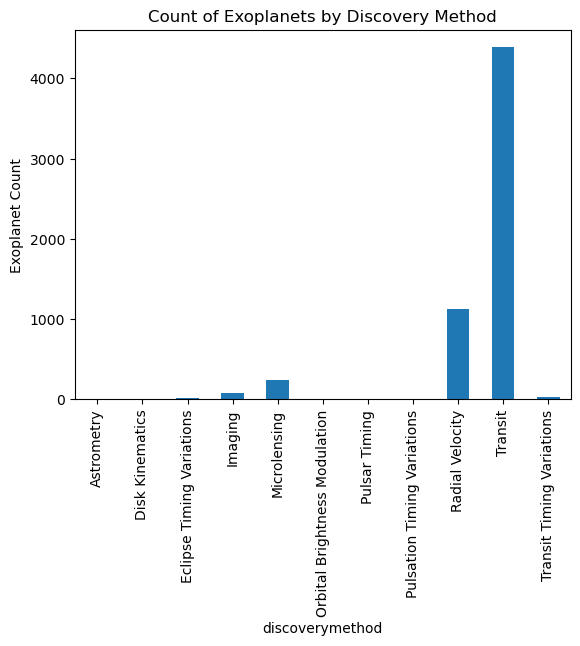

In [17]:
exoplanets_df.groupby('discoverymethod')['pl_name'].count().plot(kind = 'bar')
plt.title('Count of Exoplanets by Discovery Method')
plt.ylabel('Exoplanet Count');

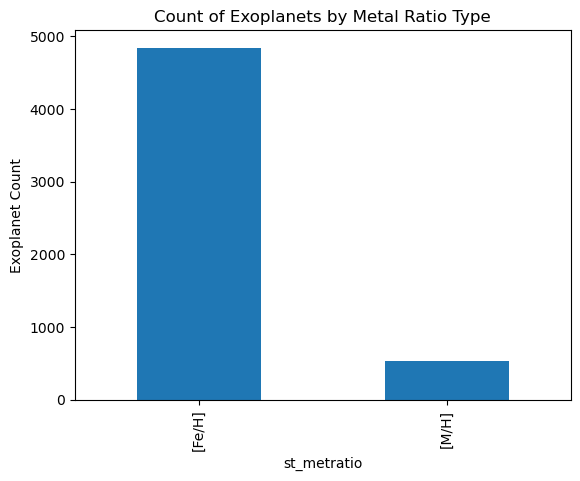

In [18]:
exoplanets_df.groupby('st_metratio')['pl_name'].count().plot(kind = 'bar')
plt.title('Count of Exoplanets by Metal Ratio Type')
plt.ylabel('Exoplanet Count');

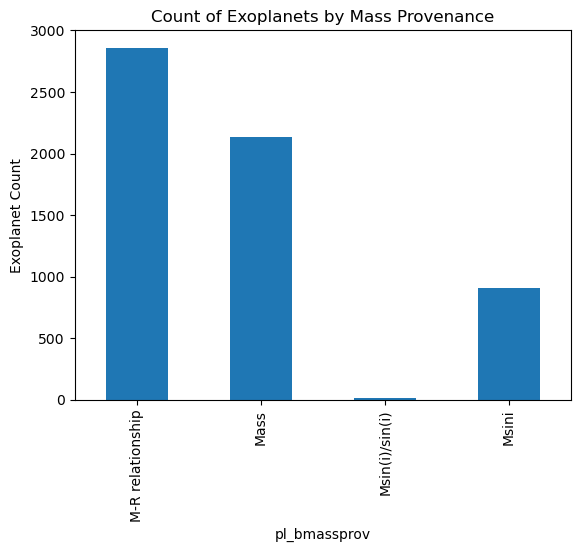

In [19]:
exoplanets_df.groupby('pl_bmassprov')['pl_name'].count().plot(kind = 'bar')
plt.title('Count of Exoplanets by Mass Provenance')
plt.ylabel('Exoplanet Count');

In [20]:
dropped_columns = ['hostname', 'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqterr1', 'pl_eqterr2', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_masserr1', 'st_masserr2', 'st_metlim', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'decstr', 'sy_disterr1', 'sy_disterr2', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'st_masslim', 'st_meterr1', 'st_meterr2', 'pl_eqtlim', 	] 
exoplanets_df = exoplanets_df.drop(columns=dropped_columns)
exoplanets_df.head()

pl_name  sy_snum  sy_pnum  discoverymethod   pl_orbper  pl_orbsmax  \
0    11 Com b        2        1  Radial Velocity   323.21000       1.178   
1    11 UMi b        1        1  Radial Velocity   516.21997       1.530   
2    14 And b        1        1  Radial Velocity   186.76000       0.775   
3    14 Her b        1        2  Radial Velocity  1765.03890       2.774   
4  16 Cyg B b        3        1  Radial Velocity   798.50000       1.660   

   pl_rade    pl_bmasse pl_bmassprov  pl_orbeccen  pl_insol  pl_eqt  ttv_flag  \
0     12.2  4914.898486        Msini        0.238       NaN     NaN         0   
1     12.3  4684.814200        Msini        0.080       NaN     NaN         0   
2     13.1  1131.151301        Msini        0.000       NaN     NaN         0   
3     12.6  2559.472162         Mass        0.373       NaN     NaN         0   
4     13.5   565.737400        Msini        0.680       NaN     NaN         0   

  st_spectype  st_teff  st_rad  st_mass  st_met st_metratio  st_logg  \
0      G8 III   4874.0   13.76     2.09 -0.2600      [Fe/H]     2.45   
1      K4 III   4213.0   29.79     2.78 -0.0200      [Fe/H]     1.93   
2      K0 III   4888.0   11.55     1.78 -0.2100      [Fe/H]     2.55   
3         K0V   5338.0    0.93     0.91  0.4052      [Fe/H]     4.45   
4        G3 V   5750.0    1.13     1.08  0.0600      [Fe/H]     4.36   

           ra        dec   sy_dist  sy_vmag  sy_kmag  sy_gaiamag  
0  185.178779  17.793252   93.1846  4.72307    2.282     4.44038  
1  229.274595  71.823943  125.3210  5.01300    1.939     4.56216  
2  352.824150  39.235837   75.4392  5.23133    2.331     4.91781  
3  242.602101  43.816362   17.9323  6.61935    4.714     6.38300  
4  295.465642  50.516824   21.1397  6.21500    4.651     6.06428

discoverymethod = Radial Velocity and Transit, 

pl_bmasse = (0.39, 3.19),

pl_rade = (0.92, 1.60),

pl_insol = (0.25, 1.48),

pl_eqt = (203, 316),

pl_orbper = (4.05, 267),

sy_dist = (4.2, 1193)

In [22]:
exoplanets_df['discoverymethod'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Microlensing', 'Transit', 'Transit Timing Variations',
       'Astrometry', 'Disk Kinematics', 'Orbital Brightness Modulation',
       'Pulsation Timing Variations', 'Pulsar Timing'], dtype=object)

In [23]:
exoplanets_df['Distance_ly'] = exoplanets_df['sy_dist'] * 3.26156
exoplanets_df.head()

pl_name  sy_snum  sy_pnum  discoverymethod   pl_orbper  pl_orbsmax  \
0    11 Com b        2        1  Radial Velocity   323.21000       1.178   
1    11 UMi b        1        1  Radial Velocity   516.21997       1.530   
2    14 And b        1        1  Radial Velocity   186.76000       0.775   
3    14 Her b        1        2  Radial Velocity  1765.03890       2.774   
4  16 Cyg B b        3        1  Radial Velocity   798.50000       1.660   

   pl_rade    pl_bmasse pl_bmassprov  pl_orbeccen  pl_insol  pl_eqt  ttv_flag  \
0     12.2  4914.898486        Msini        0.238       NaN     NaN         0   
1     12.3  4684.814200        Msini        0.080       NaN     NaN         0   
2     13.1  1131.151301        Msini        0.000       NaN     NaN         0   
3     12.6  2559.472162         Mass        0.373       NaN     NaN         0   
4     13.5   565.737400        Msini        0.680       NaN     NaN         0   

  st_spectype  st_teff  st_rad  st_mass  st_met st_metratio  st_logg  \
0      G8 III   4874.0   13.76     2.09 -0.2600      [Fe/H]     2.45   
1      K4 III   4213.0   29.79     2.78 -0.0200      [Fe/H]     1.93   
2      K0 III   4888.0   11.55     1.78 -0.2100      [Fe/H]     2.55   
3         K0V   5338.0    0.93     0.91  0.4052      [Fe/H]     4.45   
4        G3 V   5750.0    1.13     1.08  0.0600      [Fe/H]     4.36   

           ra        dec   sy_dist  sy_vmag  sy_kmag  sy_gaiamag  Distance_ly  
0  185.178779  17.793252   93.1846  4.72307    2.282     4.44038   303.927164  
1  229.274595  71.823943  125.3210  5.01300    1.939     4.56216   408.741961  
2  352.824150  39.235837   75.4392  5.23133    2.331     4.91781   246.049477  
3  242.602101  43.816362   17.9323  6.61935    4.714     6.38300    58.487272  
4  295.465642  50.516824   21.1397  6.21500    4.651     6.06428    68.948400

In [24]:
scale_features = exoplanets_df.drop(columns=['pl_bmasse', 'pl_rade', 'pl_name', 'pl_insol', 'pl_eqt', 'pl_orbper', 'discoverymethod', 'sy_dist', 'pl_bmassprov', 'ttv_flag', 'st_spectype', 'st_metratio', 'sy_dist']).columns.tolist()
ohe_features = exoplanets_df[['st_spectype', 'st_metratio']].columns.tolist()
bool_features = exoplanets_df[['ttv_flag']].columns.tolist()

In [25]:
nan_rows = exoplanets_df[exoplanets_df.isna().any(axis=1)]

mask = (
    (exoplanets_df['discoverymethod'].isin(['Radial Velocity', 'Transit'])) &
    (exoplanets_df['pl_bmasse'].between(0.39, 3.19)) &
    (exoplanets_df['pl_rade'].between(0.92, 1.60)) &
    (exoplanets_df['pl_insol'].between(0.25, 1.48)) &
    (exoplanets_df['pl_eqt'].between(203, 316)) &
    (exoplanets_df['pl_orbper'].between(4.05, 267))
).dropna()

exoplanets_df['is_habitable'] = 0
exoplanets_df.loc[mask, 'is_habitable'] = 1

In [26]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')
bool_imp = SimpleImputer(strategy='most_frequent')
exoplanets_df[scale_features] = num_imp.fit_transform(exoplanets_df[scale_features])
exoplanets_df[ohe_features] = cat_imp.fit_transform(exoplanets_df[ohe_features])
exoplanets_df[bool_features] = bool_imp.fit_transform(exoplanets_df[bool_features])

In [27]:
X = exoplanets_df.drop(columns=['pl_name', 'pl_bmassprov', 'sy_dist', 'is_habitable'])
y = exoplanets_df['is_habitable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 321,  stratify = y)

In [28]:
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(categories='auto', handle_unknown = 'ignore'))
])

ct = ColumnTransformer(
    transformers=[
        ('num_pipe', num_pipe, scale_features),
        ('cat_pipe', cat_pipe, ohe_features)
    ],
    remainder='drop'
)

pipe = Pipeline(
    steps=[
        ('transformer', ct)
    ])

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sy_snum', 'sy_pnum',
                                                   'pl_orbsmax', 'pl_orbeccen',
                                                   'st_teff', 'st_rad',
                                                   'st_mass', 'st_met',
                                                   'st_logg', 'ra', 'dec',
                                                   'sy_vmag', 'sy_kmag',
                                                   'sy_gaiamag',
                                                   'Distance_ly']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['st_spectype',
                                                   'st_metratio'])]))])

In [30]:
X_train_transformed = pipe.transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [31]:
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

In [32]:
%%time

param_dist_grad = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': np.linspace(0.5, 1.0, 6)
}

model_grad = GradientBoostingClassifier()
random_search_grad = RandomizedSearchCV(
    estimator=model_grad,
    param_distributions=param_dist_grad,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=321
)

random_search_grad.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", random_search_grad.best_params_)
print("Best Score:", random_search_grad.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.1388888888888889}
Best Score: 0.9983046378511269
CPU times: total: 14min 6s
Wall time: 14min 16s


In [33]:
best_model_grad = random_search_grad.best_estimator_
y_pred_grad = best_model_grad.predict(X_test_transformed)

In [34]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_grad)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred_grad)}')
print(confusion_matrix(y_test, y_pred_grad))
print(classification_report(y_test, y_pred_grad, zero_division = 0))

Accuracy: 0.9977477477477478
MCC: 0.4467094086480023
[[1771    0]
 [   4    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      0.20      0.33         5

    accuracy                           1.00      1776
   macro avg       1.00      0.60      0.67      1776
weighted avg       1.00      1.00      1.00      1776



In [35]:
%%time

param_dist_log = {
    'C': np.logspace(-4, 4, 20),               
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga'],           
    'max_iter': [100, 200, 500]
}

log_reg = LogisticRegression()
search_log = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist_log,
    n_iter=10,                
    scoring='f1',
    cv=5,
    random_state=321,
    n_jobs=-1
)

search_log.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", search_log.best_params_)
print("Best Score:", search_log.best_score_)

C:\Users\solid\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\solid\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\solid\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\solid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _c

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 10000.0}
Best Score: 0.9852125621499536
CPU times: total: 469 ms
Wall time: 12.5 s


In [36]:
best_model_log = search_log.best_estimator_
y_pred_log = best_model_log.predict(X_test_transformed)

In [37]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_log)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred_log)}')
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, zero_division = 0))

Accuracy: 0.972972972972973
MCC: 0.1856870506310548
[[1725   46]
 [   2    3]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1771
           1       0.06      0.60      0.11         5

    accuracy                           0.97      1776
   macro avg       0.53      0.79      0.55      1776
weighted avg       1.00      0.97      0.98      1776



In [38]:
%%time

param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-5, -1, 5),           
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500]
}

mlp = MLPClassifier(random_state=321)

search_mlp = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist_mlp,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=321,
    n_jobs=-1
)

search_mlp.fit(X_train_balanced, y_train_balanced)


CPU times: total: 15.7 s
Wall time: 1min 2s


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=321), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]),
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (100, 50),
                                                               (50, 50, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'max_iter': [200, 300, 500],
                                        'solver': ['adam', 'sgd']},
                   random_state=321, scoring='f1')

In [39]:
best_model_mlp = search_mlp.best_estimator_
y_pred_mlp = best_model_mlp.predict(X_test_transformed)

print("Best Parameters:", search_mlp.best_params_)

Best Parameters: {'solver': 'adam', 'max_iter': 300, 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'relu'}


In [78]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred_mlp)}')
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, zero_division = 0))

Accuracy: 0.9960585585585585
MCC: 0.22165032598869927
[[1768    3]
 [   4    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       0.25      0.20      0.22         5

    accuracy                           1.00      1776
   macro avg       0.62      0.60      0.61      1776
weighted avg       1.00      1.00      1.00      1776



In [80]:
%%time

best_model = GradientBoostingClassifier(n_estimators = 800, subsample = 0.8, max_depth = 5, learning_rate = 0.1388888888888889)

best_model.fit(X_train_balanced, y_train_balanced)

CPU times: total: 41.7 s
Wall time: 42.4 s


GradientBoostingClassifier(learning_rate=0.1388888888888889, max_depth=5,
                           n_estimators=800, subsample=0.8)

In [82]:
y_pred_best = best_model.predict(X_test_transformed)

print(f'Accuracy: {accuracy_score(y_test, y_pred_best)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred_best)}')
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, zero_division = 0))

Accuracy: 0.9977477477477478
MCC: 0.4467094086480023
[[1771    0]
 [   4    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      0.20      0.33         5

    accuracy                           1.00      1776
   macro avg       1.00      0.60      0.67      1776
weighted avg       1.00      1.00      1.00      1776



In [84]:
X_test_copy = X_test
X_test_copy['actual'] = y_test
X_test_copy['predicted'] = y_pred_best

true_positives = X_test_copy[
    (X_test_copy['actual'] == 'positive_class_label') &
    (X_test_copy['predicted'] == 'positive_class_label')
]

true_positives = X_test_copy[(X_test_copy['actual'] == 1) & (X_test_copy['predicted'] == 1)]

true_positives

sy_snum  sy_pnum discoverymethod  pl_orbper  pl_orbsmax  pl_rade  \
5571      1.0      4.0         Transit   37.42396      0.1633    1.073   

      pl_bmasse  pl_orbeccen  pl_insol  pl_eqt  ttv_flag st_spectype  st_teff  \
5571       1.25        0.042      0.85   268.8         0      M2.5 V   3459.0   

      st_rad  st_mass  st_met st_metratio  st_logg         ra        dec  \
5571   0.421    0.415   -0.07      [Fe/H]    4.809  97.095716 -65.578615   

      sy_vmag  sy_kmag  sy_gaiamag  Distance_ly  actual  predicted  
5571   13.151    8.634     12.0665   101.520947       1          1

In [86]:
#indices = [1662, 5571, 5618	, 5853]

indices = [5571]

habitable_df = exoplanets_df.loc[indices]

habitable_df

pl_name  sy_snum  sy_pnum discoverymethod  pl_orbper  pl_orbsmax  \
5571  TOI-700 d      1.0      4.0         Transit   37.42396      0.1633   

      pl_rade  pl_bmasse      pl_bmassprov  pl_orbeccen  pl_insol  pl_eqt  \
5571    1.073       1.25  M-R relationship        0.042      0.85   268.8   

      ttv_flag st_spectype  st_teff  st_rad  st_mass  st_met st_metratio  \
5571         0      M2.5 V   3459.0   0.421    0.415   -0.07      [Fe/H]   

      st_logg         ra        dec  sy_dist  sy_vmag  sy_kmag  sy_gaiamag  \
5571    4.809  97.095716 -65.578615  31.1265   13.151    8.634     12.0665   

      Distance_ly  is_habitable  
5571   101.520947             1

In [88]:
ohe = pipe.named_steps['transformer'].named_transformers_['cat_pipe']
cat_feature_names = ohe.get_feature_names_out(ohe_features)
all_feature_names = list(scale_features) + list(cat_feature_names)
cat_feature_names
importances = best_model.feature_importances_

feat_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_df.head(10)

feature  importance
5            st_rad    0.693745
8           st_logg    0.118957
2        pl_orbsmax    0.066508
3       pl_orbeccen    0.046616
252  st_spectype_M4    0.016678
11          sy_vmag    0.015066
12          sy_kmag    0.007495
10              dec    0.006246
6           st_mass    0.005228
7            st_met    0.003916

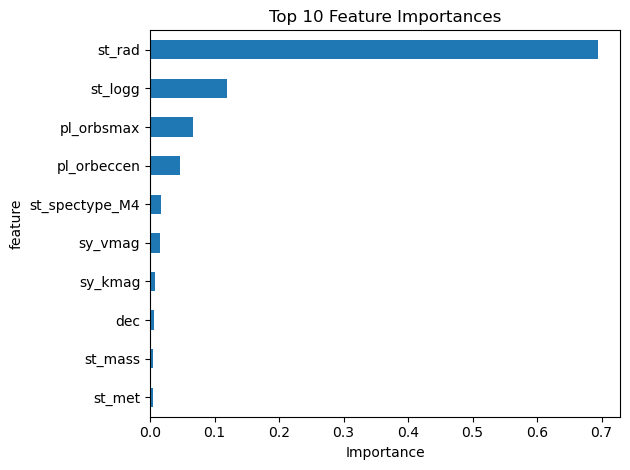

In [90]:
feat_df.head(10).plot(kind='barh', x='feature', y='importance', legend=False)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [92]:
nan_rows

pl_name  sy_snum  sy_pnum  \
0                          11 Com b        2        1   
1                          11 UMi b        1        1   
2                          14 And b        1        1   
3                          14 Her b        1        2   
4                        16 Cyg B b        3        1   
5                          17 Sco b        1        1   
6                          18 Del b        2        1   
7           1RXS J160929.1-210524 b        1        1   
8                          24 Boo b        1        1   
9                          24 Sex b        1        2   
10                         24 Sex c        1        2   
11                         2M0437 b        1        1   
12     2MASS J01033563-5515561 AB b        2        1   
13        2MASS J01225093-2439505 b        1        1   
14        2MASS J02192210-3925225 b        1        1   
15               2MASS J0249-0557 c        2        1   
16        2MASS J03590986+2009361 b        1        1   
17        2MASS J04414489+2301513 b        1        1   
18        2MASS J11011926-7732383 b        1        1   
19        2MASS J11550485-7919108 b        1        1   
20        2MASS J12073346-3932539 b        1        1   
21        2MASS J19383260+4603591 b        2        3   
22        2MASS J21252752-8138278 b        1        1   
23        2MASS J22362452+4751425 b        1        1   
24                       30 Ari B b        4        1   
25                          4 UMa b        1        1   
26                         47 UMa b        1        3   
27                         47 UMa c        1        3   
28                         47 UMa d        1        3   
29                         51 Eri b        3        1   
30                         51 Peg b        1        1   
31                         55 Cnc b        2        5   
32                         55 Cnc c        2        5   
33                         55 Cnc d        2        5   
35                         55 Cnc f        2        5   
36                          6 Lyn b        1        1   
37                         61 Vir b        1        3   
38                         61 Vir c        1        3   
39                         61 Vir d        1        3   
40                          7 CMa b        1        2   
41                          7 CMa c        1        2   
42                         70 Vir b        1        1   
43                         75 Cet b        2        2   
44                         75 Cet c        2        2   
45                          8 UMi b        1        1   
46                         81 Cet b        1        1   
47                         91 Aqr b        3        1   
48                         AB Aur b        1        1   
49                         AB Pic b        1        1   
50                         AF Lep b        1        1   
51                     AT2021ueyL b        1        1   
54                         AU Mic d        1        3   
55                     BD+03 2562 b        1        1   
56                   BD+05 4868 A b        2        1   
57                     BD+14 4559 b        1        1   
58                     BD+15 2375 b        1        1   
59                     BD+15 2940 b        1        1   
60                     BD+20 2457 b        1        2   
61                     BD+20 2457 c        1        2   
62                      BD+20 274 b        1        1   
63                      BD+20 594 b        1        1   
64                      BD+45 564 b        1        1   
65                      BD+48 738 b        1        1   
66                      BD+48 740 b        1        1   
67                      BD+49 828 b        1        1   
68                      BD+55 362 b        1        1   
69                     BD+60 1417 b        1        1   
70                     BD+63 1405 b        1        1   
71                     BD-06 1339 b        1        2   
72                     BD-06 1339 c   

In [98]:
scale_features_nan = nan_rows.drop(columns=['pl_bmasse', 'pl_rade', 'pl_name', 'pl_insol', 'pl_eqt', 'pl_orbper', 'discoverymethod', 'sy_dist', 'pl_bmassprov', 'ttv_flag', 'st_spectype', 'st_metratio', 'sy_dist']).columns.tolist()
ohe_features_nan = nan_rows[['st_spectype', 'st_metratio']].columns.tolist()
bool_features_nan = nan_rows[['ttv_flag']].columns.tolist()
nan_rows[scale_features] = num_imp.fit_transform(nan_rows[scale_features])
nan_rows[ohe_features] = cat_imp.fit_transform(nan_rows[ohe_features])
nan_rows[bool_features] = bool_imp.fit_transform(nan_rows[bool_features])
nan_rows_transformed = pipe.transform(nan_rows)

C:\Users\solid\AppData\Local\Temp\ipykernel_90880\1353606600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows[scale_features] = num_imp.fit_transform(nan_rows[scale_features])
C:\Users\solid\AppData\Local\Temp\ipykernel_90880\1353606600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows[ohe_features] = cat_imp.fit_transform(nan_rows[ohe_features])
C:\Users\solid\AppData\Local\Temp\ipykernel_90880\1353606600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [108]:
y_pred_nan = best_model.predict(nan_rows_transformed)

In [120]:
nan_rows_copy = nan_rows

nan_rows['predicted'] = y_pred_nan
nan_rows['prob'] = best_model.predict_proba(nan_rows_transformed)[:, 1]

true_positives = nan_rows_copy[(nan_rows_copy['predicted'] == 1)]

true_positives

C:\Users\solid\AppData\Local\Temp\ipykernel_90880\1914571190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows['predicted'] = y_pred_nan
C:\Users\solid\AppData\Local\Temp\ipykernel_90880\1914571190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows['prob'] = best_model.predict_proba(nan_rows_transformed)[:, 1]


pl_name  sy_snum  sy_pnum  discoverymethod   pl_orbper  \
195       GJ 1002 b      1.0      2.0  Radial Velocity   10.346500   
2374  Kepler-1229 b      1.0      1.0          Transit   86.828989   
2952  Kepler-1652 b      1.0      1.0          Transit   38.097220   
4048   Kepler-438 b      1.0      1.0          Transit   35.233190   
4053   Kepler-442 b      1.0      1.0          Transit  112.305300   
4812     L 363-38 b      1.0      1.0  Radial Velocity    8.781000   
5050  Proxima Cen b      3.0      1.0  Radial Velocity   11.186800   
5577      TOI-715 b      1.0      1.0          Transit   19.288004   
5617   TRAPPIST-1 e      1.0      7.0          Transit    6.101013   

      pl_orbsmax  pl_rade  pl_bmasse      pl_bmassprov  pl_orbeccen  pl_insol  \
195      0.04570     1.03      1.080             Msini     0.076115     0.670   
2374     0.30060     1.40      2.540  M-R relationship     0.000000     0.524   
2952     0.16540     1.60      3.190  M-R relationship     0.000000     0.810   
4048     0.16600     1.12      1.460  M-R relationship     0.030000     1.400   
4053     0.40900     1.34      2.360  M-R relationship     0.040000     0.660   
4812     0.04800     2.00      4.670             Msini     0.076115       NaN   
5050     0.04856     1.03      1.070             Msini     0.020000     0.650   
5577     0.08300     1.55      3.020  M-R relationship     0.076115     0.670   
5617     0.02925     0.92      0.692              Mass     0.005100     0.646   

      pl_eqt  ttv_flag st_spectype  st_teff  st_rad  st_mass   st_met  \
195    230.9         0      M5.5 V   3024.0  0.1370   0.1200 -0.25000   
2374   212.0         0          K0   3784.0  0.5100   0.5400 -0.06000   
2952   268.0         0          K0   3638.0  0.3820   0.4040 -0.30000   
4048   288.0         0          K0   3748.0  0.5200   0.5440  0.16000   
4053   241.0         0          K0   4402.0  0.5980   0.6090 -0.37000   
4812   330.0         0          K0   3129.0  0.2740   0.2100  0.01428   
5050   234.0         0      M5.5 V   2900.0  0.1410   0.1221  0.01428   
5577   234.0         0          M4   3075.0  0.2400   0.2250 -0.25000   
5617   249.7         1          K0   2566.0  0.1192   0.0898  0.04000   

     st_metratio  st_logg          ra        dec     sy_dist  sy_vmag  \
195       [Fe/H]  5.10000    1.676464  -7.546212    4.848670   13.760   
2374      [Fe/H]  4.75000  297.486835  46.996678  265.482000   16.124   
2952      [Fe/H]  4.87800  294.366031  49.915022  252.000000   16.860   
4048      [Fe/H]  4.74000  281.645724  41.951069  195.942872   15.104   
4053      [Fe/H]  4.67300  285.366603  39.280070  365.965000   15.322   
4812      [Fe/H]  4.97000   10.855544 -41.295293   10.229500   13.027   
5050      [Fe/H]  5.16372  217.393466 -62.676182    1.301190   11.010   
5577      [Fe/H]  5.00000  113.852328 -73.577409   42.404800   16.683   
5617      [Fe/H]  5.23960  346.626392  -5.043462   12.429889   17.020   

      sy_kmag  sy_gaiamag  Distance_ly  predicted      prob  
195     7.439    11.78040    15.814228          1  1.000000  
2374   12.374    15.51040   865.885472          1  0.999989  
2952   12.635    16.00230   821.913120          1  1.000000  
4048   11.199    14.48520   639.079433          1  0.999977  
4053   12.488    14.93040  1193.616805          1  0.999970  
4812    7.710    11.56070    33.364128          1  0.685392  
5050    4.384     8.95361     4.243909          1  1.000000  
5577   10.917    14.89400   138.305799          1  1.000000  
5617   10.296    15.64510    40.540828          1  0.999971

In [122]:
col = ['pl_name', 'predicted', 'prob']
true_positives[col]

pl_name  predicted      prob
195       GJ 1002 b          1  1.000000
2374  Kepler-1229 b          1  0.999989
2952  Kepler-1652 b          1  1.000000
4048   Kepler-438 b          1  0.999977
4053   Kepler-442 b          1  0.999970
4812     L 363-38 b          1  0.685392
5050  Proxima Cen b          1  1.000000
5577      TOI-715 b          1  1.000000
5617   TRAPPIST-1 e          1  0.999971

In [ ]:
#from sklearn.decomposition import PCA
#from sklearn.cluster import DBSCAN
#import matplotlib.pyplot as plt

#dbscan = DBSCAN(eps=1.0, min_samples=2)
#labels = dbscan.fit_predict(nan_rows_transformed)

#pca = PCA(n_components=2)
#nan_rows_2d = pca.fit_transform(nan_rows_transformed.toarray() if hasattr(nan_rows_transformed, 'toarray') else nan_rows_transformed)

#plt.scatter(nan_rows_2d[:, 0], nan_rows_2d[:, 1], c=labels, cmap='viridis', s=50)
#plt.title("DBSCAN Clustering (PCA Reduced)")
#plt.show()

In [126]:
exoplanets_df['is_habitable'].mean()

0.0028730775730944737

In [148]:
import numpy as np

if hasattr(X_train_balanced, "toarray"):
    X_dense = X_train_balanced.toarray()
else:
    X_dense = np.array(X_train_balanced)

In [150]:
len(all_feature_names) == X_dense.shape[1]

True

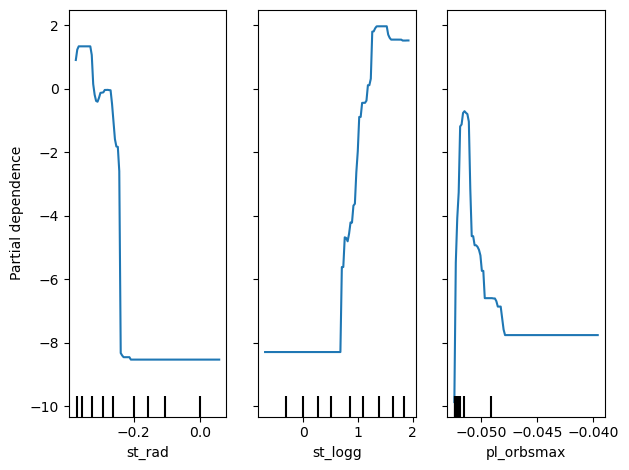

In [152]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

top_features = feat_df['feature'].head(3).tolist()  # top 3 important features

PartialDependenceDisplay.from_estimator(
    estimator=best_model,
    X=X_dense,
    features=top_features,
    feature_names=all_feature_names,
    kind='average'
)

plt.tight_layout()
plt.show()